**Feature engineering:** deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

In [116]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')
df.shape

(2930, 82)

In [92]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [94]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style   

In [95]:
print('Number of rows in the data: ', df.shape[0])
print('Number of columns in the data: ', df.shape[1])

Number of rows in the data:  2925
Number of columns in the data:  82


In [96]:
data = df.copy()
data.shape

(2925, 82)

### One-Hot Encoding for Dummy Variables:

In [97]:
one_hot_encode_cols = df.dtypes[df.dtypes == 'object']
one_hot_encode_cols

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


In [98]:
# list of categorical fields
one_hot_encode_cols = one_hot_encode_cols.index.tolist() 
one_hot_encode_cols

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [99]:
df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [100]:
#Do one hot encoding 
df = pd.get_dummies(df, columns = one_hot_encode_cols, drop_first = True)
df.head().T

,0,1,2,3,4
Order,1.0,2.0,3.0,4.0,5.0
PID,526301100.0,526350040.0,526351010.0,526353030.0,527105010.0
MS SubClass,20.0,20.0,20.0,20.0,60.0
Lot Frontage,141.0,80.0,81.0,93.0,74.0
Lot Area,31770.0,11622.0,14267.0,11160.0,13830.0
...,...,...,...,...,...
Sale Condition_AdjLand,0.0,0.0,0.0,0.0,0.0
Sale Condition_Alloca,0.0,0.0,0.0,0.0,0.0
Sale Condition_Family,0.0,0.0,0.0,0.0,0.0
Sale Condition_Normal,1.0,1.0,1.0,1.0,1.0


## log Transformation skew variables 

In [101]:
mask = data.dtypes == np.float
float_cols = data.columns[mask]
float_cols

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [102]:
#define a limit above which we will log transform
skew_limit = 0.75
skew_values = data[float_cols].skew()
skew_values

Lot Frontage      1.111071
Mas Vnr Area      2.565458
BsmtFin SF 1      0.821985
BsmtFin SF 2      4.135900
Bsmt Unf SF       0.925021
Total Bsmt SF     0.399079
Bsmt Full Bath    0.615553
Bsmt Half Bath    3.965970
Garage Yr Blt    -0.382039
Garage Cars      -0.219734
Garage Area       0.213681
dtype: float64

In [103]:
#showing the skewed columns 
skew_cols = (skew_values
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
BsmtFin SF 2,4.135900
Bsmt Half Bath,3.965970
Mas Vnr Area,2.565458
Lot Frontage,1.111071
Bsmt Unf SF,0.925021
BsmtFin SF 1,0.821985


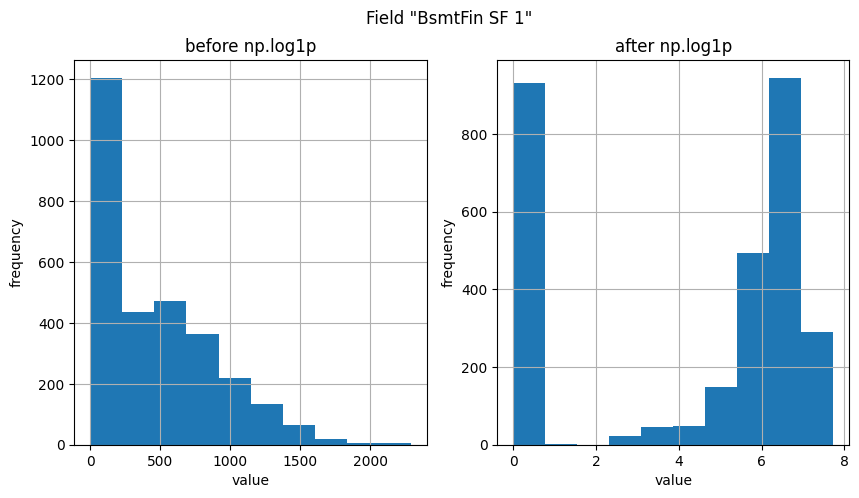

In [104]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

#create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

#Apply a log transformation to this column
df[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [105]:
#Perfome the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [106]:
# We now have a larger set of potentially-useful features
df.shape

(2925, 262)

In [107]:
skew_cols.index.values

array(['BsmtFin SF 2', 'Bsmt Half Bath', 'Mas Vnr Area', 'Lot Frontage',
       'Bsmt Unf SF', 'BsmtFin SF 1'], dtype=object)

In [109]:
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [110]:
#Let's pick out just a few numeric columns to illustrate basic feature transformations.
smaller_df= df.loc[:,['Lot Area',
                      'Overall Qual',
                      'Overall Cond', 
                      'Year Built',
                      'Year Remod/Add',
                      'Gr Liv Area', 
                      'Full Bath', 
                      'Bedroom AbvGr',
                      'Fireplaces', 
                      'Garage Cars',
                      'SalePrice']]

In [111]:
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2925.0,1493.978803,486.273646,334.0,1126.0,1441.0,1740.0,3820.0
Full Bath,2925.0,1.564786,0.551386,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2925.0,2.853675,0.827737,0.0,2.0,3.0,3.0,8.0
Fireplaces,2925.0,0.596923,0.645349,0.0,0.0,1.0,1.0,4.0
Garage Cars,2924.0,1.765048,0.759834,0.0,1.0,2.0,2.0,5.0


In [112]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [113]:
smaller_df = smaller_df.fillna(1.765048)

In [114]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


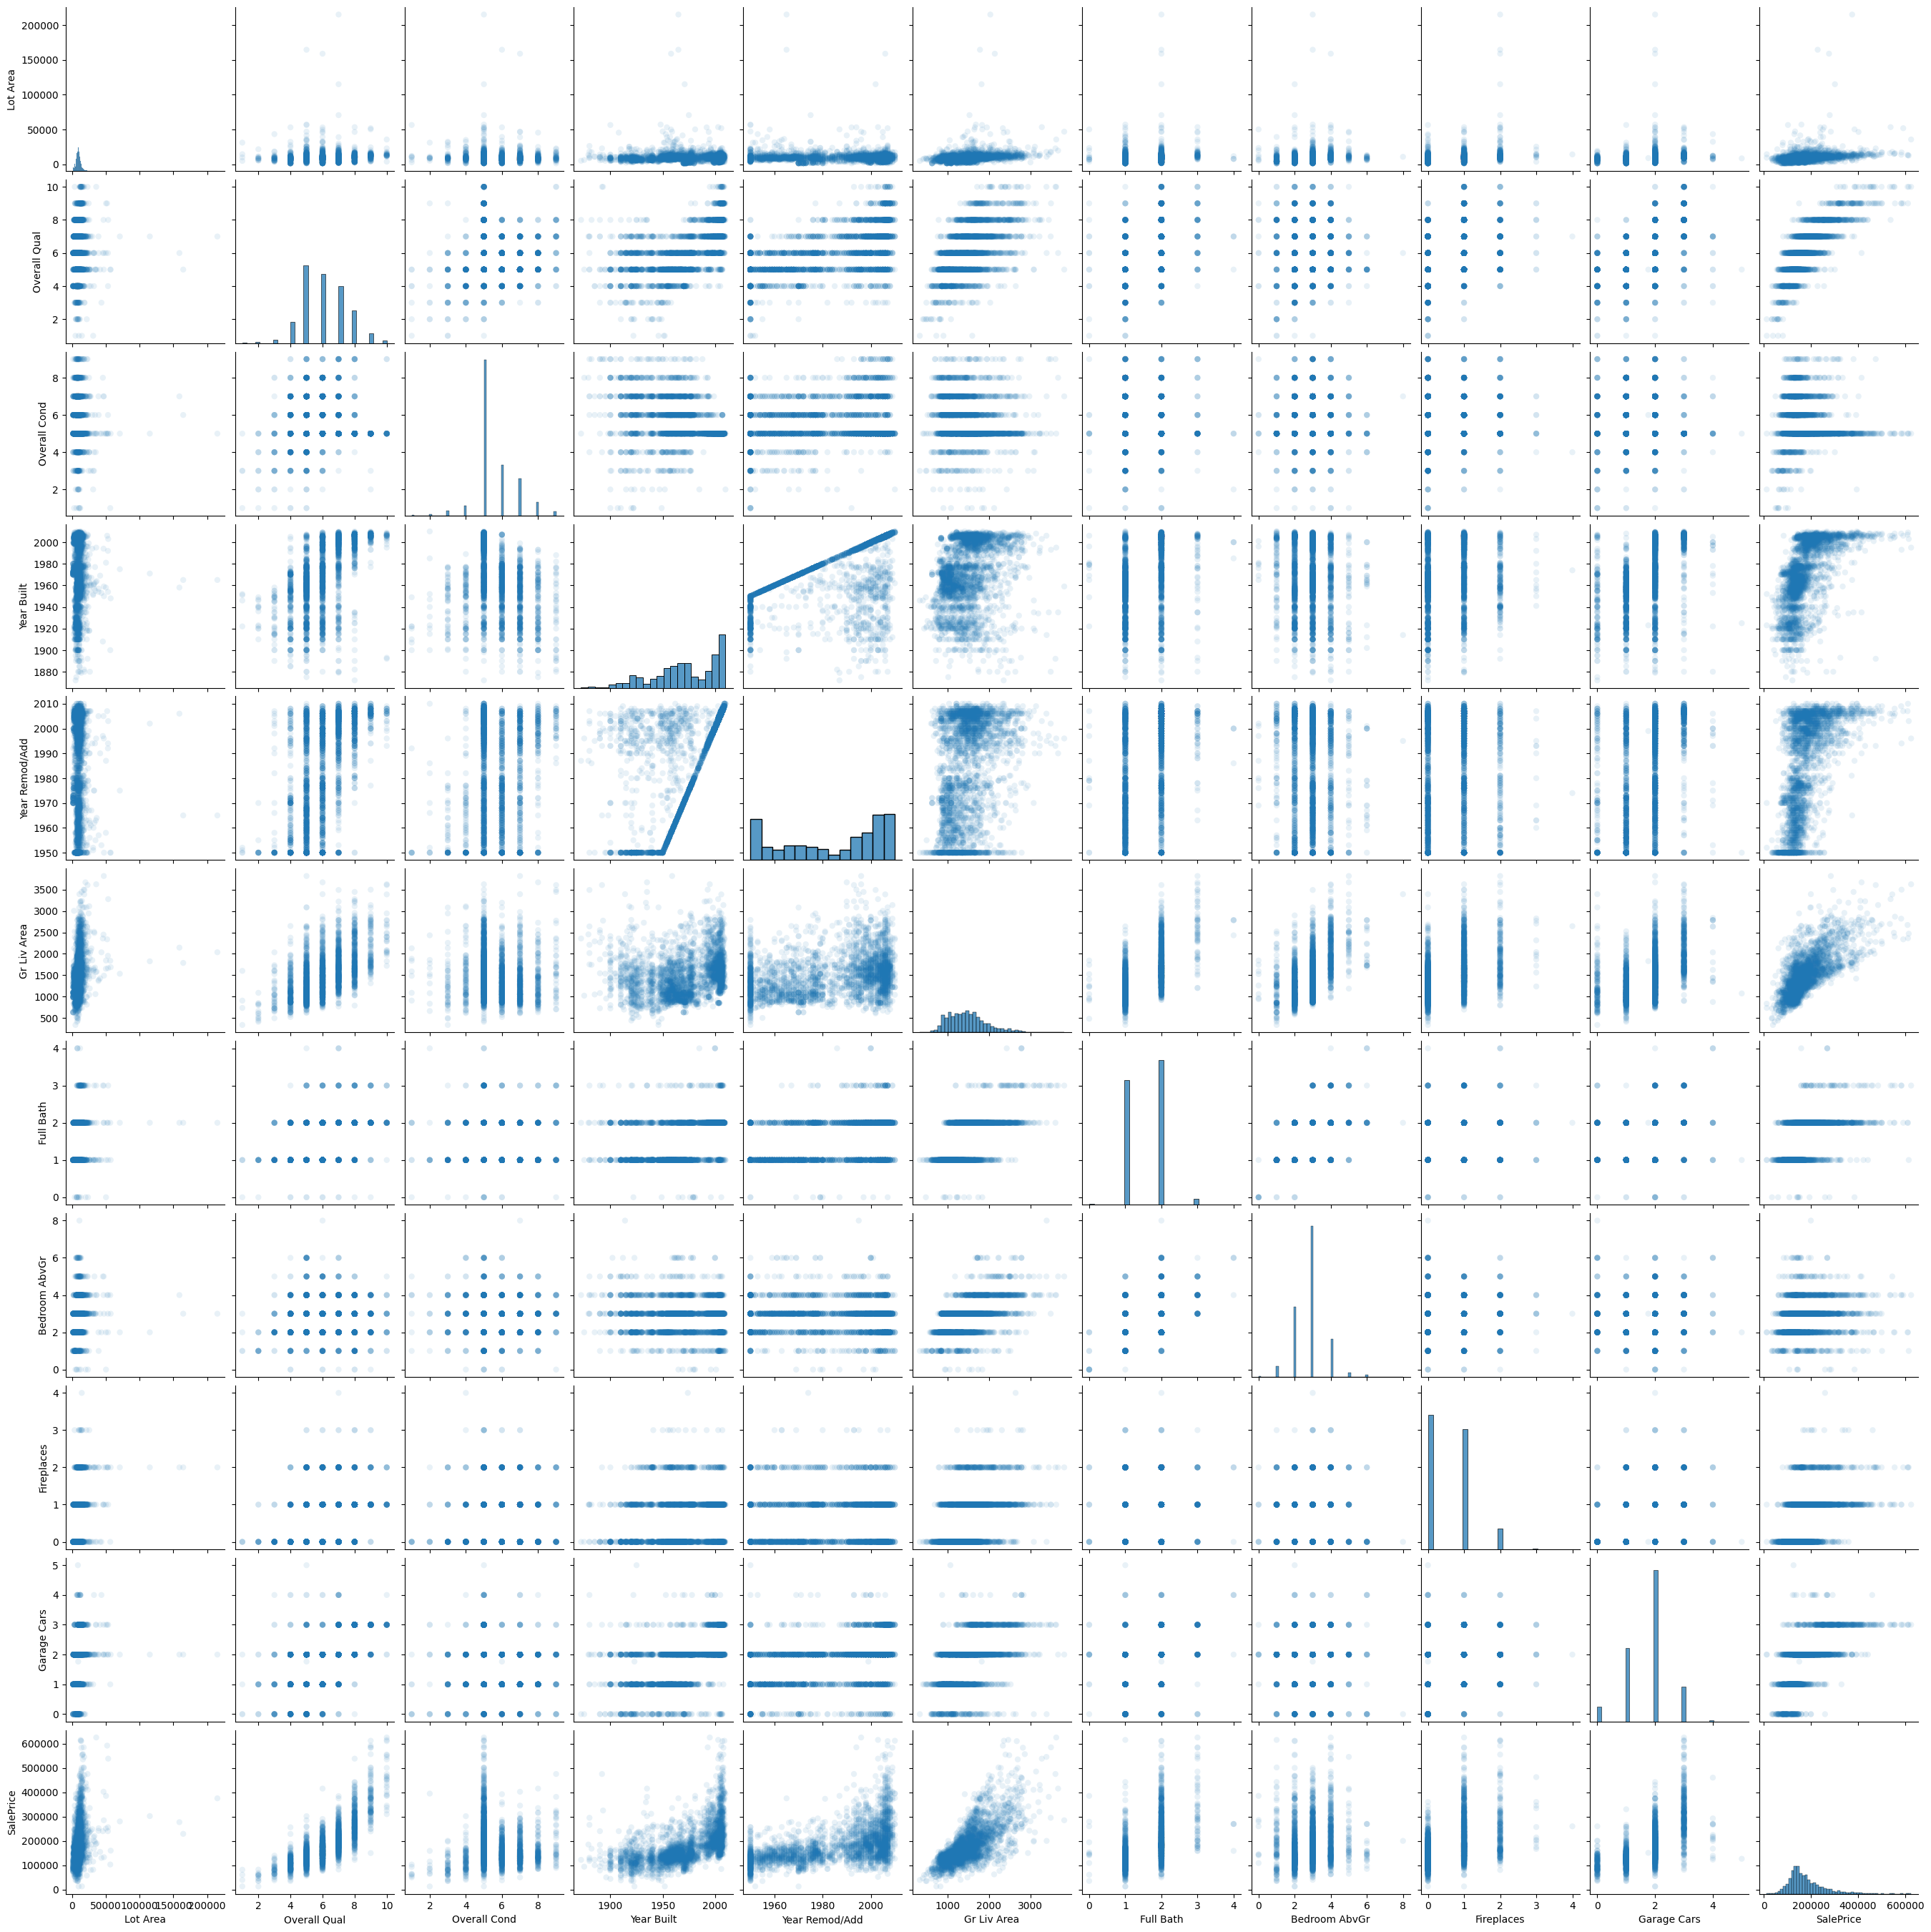

In [117]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [118]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 315.9 KB
